[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RikVoorhaar/probastat2020/blob/master/notebooks/serie1.ipynb?hl=fr)

# Série 1

## Exercice 1
### Exerice 1a)
<div class="alert alert-info">
**Exercice 1a)**

Soit $A^*$ l’ensemble des mots finis sur l’alphabet $\{0; 1\}$. On ordonne
les éléments de $A^*$ selon leur longueur et pour des éléments de
même longueur, selon l’ordre lexicographique :

$$A^* = \{0; 1; 00; 01; 10; 11; 000; 001; 010 : 011; 100; 101; 110; 111; \dots\}.$$

Ecrire un programme Python qui à partir d’un entier $n$, produit
le $n$-ième mot de $A^*$.
</div>

Remarquons que $A^*$ est l'union de mots d'une longueure donnée. Dans la groupe des mots de longuer $\ell$ il y a $2^\ell$ éléments, et ils sont énumeré par les nombres $0,\dots,2^\ell-1$ exprimés en binaire (avec des zeros ajoutés). Alors étant donné un nombre $n$ on doit:

1. Trouver la nombre $\ell$ tel que 

$$
    2^1+2^2+\dots+2^{\ell-1} < n \leq 2^1+2^2+\dots+2^{\ell}
$$

2. Exprimer $n-\sum_{i=1}^{\ell-1}2^i$ en binaire et ajouter des zéros. 

Rappelons la formule des séries géometrique:

$$
a + ar + a^2+\dots ar^{n-1} = a\left(\frac{1-r^n}{1-r}\right)
$$

Dans notre cas, $a=2,r=2,n=\ell-1$, donc

$$
    \sum_{i=1}^\ell 2^i = 2\left(\frac{1-2^{\ell-1}}{1-2}\right) = 2^\ell-2
$$

On veut alors trouver $\ell$ tel que

$$
    2^\ell-2 < n \leq 2^{\ell+1}-2
$$

c'est-à-dire, le plus petit $\ell>0$ tel que

$$
    n+2\leq 2^{\ell+1}
$$

où

$$
    \log_2(n+2)\leq \ell+1
$$

Alors

$$
    \ell = \lceil \log_2(n+2)\rceil-1
$$

On calcule alors $\ell$ avec cette fonction:



In [1]:
from math import log2, ceil
def compute_l(n):
    return ceil(log2(n+2))-1

# Exemple
compute_l(7)

3

Pour exprimer $n$ en binaire, on peut utiliser la méthode `bin`. Exemple:

In [2]:
bin(7)

'0b111'

On voit que ce nous donne un string de $0$ et $1$ précédé par `0b`. Alors on écrit une fonction qui supprime le `0b` et ajoute un nombre correct des zéros:

In [3]:
def format_binaire(n, l):
    s = bin(n)[2:]
    return '0'*(l-len(s))+s

# Exemple
[format_binaire(n,3) for n in range(8)]

['000', '001', '010', '011', '100', '101', '110', '111']

Enfin, on combine les deux fonctions:

In [4]:
def enumerate_A(n):
    l = compute_l(n)
    n = n-2**l+1
    return format_binaire(n, l)

# Vérifier que ce donne la bonne réponse
[enumerate_A(n) for n in range(1,17)]

['0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001']

### Exercice 1b)
<div class="alert alert-info">
**Exercice 1b)**

Démontrer l’existence d’une bijection
$$b\colon \mathbb{N}\to\mathbb{N}\times\mathbb{N}$$
$$n\mapsto (x(n),y(n))$$

entre les nombre naturels $\mathbb{N}$ et le produit cartésien $\mathbb{N}\times\mathbb{N}$. Choisir
une telle bijection $b$ et écrire un programme qui calcule $x(n)$ et
$y(n)$.
</div>

On peut prendre une bijection qui suit le chemin 

$$(0,0),(0,1),(1,0),(2,0),(1,1),(0,2),(3,0),\dots$$

qui parcourt toutes les diagonales en ordre.

C'est un bijection parce que:

1. C'est clairement injective; on ne revisite aucun position

2. C'est surjective : soit $(a,b)\in \mathbb N\times\mathbb N$, alors $(a,b)$ est in le diagonal $\{(x,y)\in \mathbb N\times\mathbb N\mid x+y=a+b\}$, est ce chemin visite toutes ces diagonales en un temps fini.

Dans le $k$-ième diagonal dans ce chemin il y a $k+1$ positions $(k,0),\dots,(0,k)$. Alors, dans les premières $k-1$ diagonales il y a en total

$$1+2+\dots+k = k(k-1)/2$$

positions (c'est un nombre triangulaire).

Donc un nombre $n$ est dans le $k$-ième diagonale ssi

$$k(k-1)/2 < n \leq k(k+1)/2$$

On peut trouver $x$ tel que $n-1 = x(x-1)/2$ et puis $k=\lfloor x\rfloor$. On resout :

$$n-1 = x(x+1)/2 \Leftrightarrow x = \frac{-1\pm \sqrt{1+8(n-1)}}{2}$$

Donc on trouve que $n$ est dans le $k$-ième diagonale avec

$$k(n) = \left\lfloor\frac{-1+ \sqrt{1+8(n-1)}}{2}\right\rfloor$$

Puis on défine $t_k = k(k+1)/2$, et alors

$$x(n)=k-(n-t_k-1),\qquad y(n)=n-t_k-1$$

In [5]:
from math import sqrt
def bijection(n):
    k = int((-1+sqrt(1+8*(n-1)))/2)
    nombre_triangulaire = k*(k+1)//2
    i = n-nombre_triangulaire-1
    return (k-i, i)

[bijection(n) for n in range(1,10)]

[(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (0, 2), (3, 0), (2, 1), (1, 2)]

On peut aussi tracer la chemin:

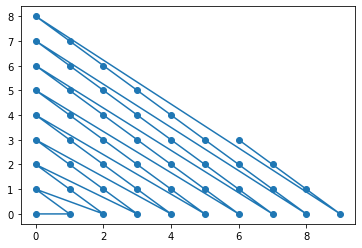

In [10]:
import matplotlib.pyplot as plt

x = []
y = []
for n in range(1,50):
    xn, yn = bijection(n)
    x.append(xn)
    y.append(yn)

plt.plot(x,y,'o-');

### Exercice 1c)
<div class="alert alert-info">
**Exercice 1c)**

Prouver que l’ensemble des suites infinies constituées de 0 et de 1
n’est pas dénombrable (Cantor).
</div>

On va prouver par contradiction. Supposons qu'il existe une applicaiton surjective 

$$
\phi\colon\mathbb N \to \{0,1\}^{\mathbb N}
$$

Dénotons $\phi(n)_k$ la $k$-ième entrée de la suite $\phi(n)$. On défine la suite $t$ par $t_k = 1-\phi(k)_k$. Cette suite est differente de $\phi(n)$ pour chaque $n$, donc $t$ n'est pas dans l'image de $\phi$ et on trouve un contradiction. Alors $\mathbb N$ n'est pas dénombrable. 

## Exerice 2

### Exercice 2a)

<div class="alert alert-info">
**Exercice 2a)**

Soit $\Omega$ un ensemble et $A$, $B$ des sous-ensembles de $\Omega$. Exprimer la
fonction caractéristique $1_{A\cup B}$ de $A\cup B$ en fonction de $1_A$ et $1_B$.
Indication : considérer $(1_\Omega − 1_A)(1_\Omega − 1_B )$.
</div>

On commence avec quelques propriétés des fonctions caractéristiques. On a clairement

$$
1_{\Omega}= 1
$$

De plus, on a que

$$
1_A1_B = 1_{A\cap B}
$$

Parce que $1_A(x)$ ssi $x\in A$, donc le produit $1_A(x)1_B(x)$ est égal à 1 ssi $x\in A$ et $x\in B$, c'est-à-dire $x\in A\cap B$. 

Nous avons d'une part

$$
\begin{align}
(1_\Omega-1_A)(1_\Omega-1_B) &= 1_\Omega^2-1_\Omega1_B+1_A1_\Omega-1_A1_B\\ &= 1-1_B-1_A+1_A1_B
\end{align}
$$

Et d'autre part

$$
\begin{align}
(1_\Omega-1_A)(1_\Omega-1_B) &= 1_{\Omega\setminus A}1_{\Omega\setminus B} = 1_{(\Omega\setminus A)\cap(\Omega\setminus B)}\\
&=1_{\Omega\setminus(A\cup B)}=1-1_{A\cup B}
\end{align}
$$

On trouve alors que

$$
    1_{A\cup B} = 1_A+1_B-1_{A\cap B}.
$$

### Exercice 2b)

<div class="alert alert-info">
**Exercice 2b)**

Soit $(\Omega, \mathcal F , P)$ un espace probabilisé. Soit $A, B \in \mathcal F$. Prouver que
$P(A \cup B) = P (A) + P (B) − P (A \cap B)$.
</div>


Rappelons que si $A$ et $B$ sont disjoints, alors $P(A\cup B)=P(A)+P(B)$.

On a que $(A\cup B)$ est une union disjointe de $A$ et $B\setminus (A\cap B)$, alors

$$
    P(A\cup B) = P(A)+P(B\setminus (A\cap B))
$$

De plus, $B$ est une union disjointe de $A\cap B$ et $B\setminus (A\cap B)$, donc

$$
    P(B) = P(B\setminus (A\cap B))+P(A\cap B)
$$

alors

$$
    P(A\cup B) = P(A)+P(B)-P(A\cap B)
$$

## Exercice 3
### Exercice 3a)

<div class="alert alert-info">
**Exercice 3a)**

On lance deux pièces de monnaie. Quelle est la probabilité d’obtenir ni deux faces ni deux piles ?
</div>

Pour chaque pièce de monnaie on a deux résultats possibles, face ($F$) ou pile ($P$). On lance deux pièces, on a alors comme résultats possibles:

$$
\Omega = \{\{F,F\},\{F,P\},\{P,F\},\{P,P\}\}
$$

On utilise la tribu maximale, avec probabilité uniforme. L'événement de obtenir ni deux faces ni deux piles est

$$
A = \{\{F,P\},\{P,F\}\}
$$

La probabilité de cet événement est

$$
P(A) = |A|/|\Omega| = 2 / 4 = 1/2
$$

### Exercice 3b)

<div class="alert alert-info">
**Exercice 3b)**

On lance 6 dés. Quelle est la probabilité que l’on obtienne 6 faces
différentes ?
</div>

Pour chaque dé on a comme possibilités $\{1,\dots,6\}$ et car on lance 6 dés on a 

$$
    \Omega = \{1,\dots,6\}^6
$$

Tous les possibilités sont équiprobable, donc on utilise la tribu maximale, et mesure de probabilité uniforme. La cardinalité de $\Omega$ est $6^6 = 46656$

Nous sommes intéressés par l'événement

$$
A = \{(x_1,\dots,x_6)\mid x_i\in \{1,\dots,6\}, \, x_i\neq x_j\,\text{si } i\neq j\}\subset \Omega
$$

Nous pouvons intepréter les suites contenu dans $A$ comme applications injectives $\{1,\dots,6\}\to \{1,\dots,6\}$, c'est-à-dire des permutations. Il y a $6! = 720$ telle suites. Alors,

$$
P(A) = |A|/|\Omega| = 6!/6^6 \simeq 0.0154
$$

On va confirmer ce resultat avec un simulation. On peut générer beaucoup des nombres aléatoires appartenant à $\{1,\dots,6\}$ avec `numpy.random.randint`. On va faire un simulation avec $10^6$ fois $6$ lances de dés, et on compte les fois où il y a 6 faces différentes.

In [7]:
import numpy as np

num_tries = 1000000

simulation = np.random.randint(1,7,size=(num_tries,6))
num_all_different = 0

for row in simulation:
    if len(set(row)) == 6: # tous faces différentes
        num_all_different += 1

print(f"nombre de fois de 6 faces différentes {num_all_different}/{num_tries}={num_all_different/num_tries:.5f}")

nombre de fois de 6 faces différentes 15355/1000000=0.01536


### Exercice 3c)

<div class="alert alert-info">
**Exercice 3c**

On lance 15 fois un dé. Quelle est la probabilité d’obtenir 8 fois
le chiffre 1 ?
</div>

On a 

$$
    \Omega = \{1,\dots,6\}^{15}
$$

avec la tribu maximale et mesure de probabilité uniforme. Considerons l'événement 

$$
A=\{(x_1,\dots,x_{15})\in \Omega\mid \#\{x_i=1\}=8 \}
$$

On doit compter la nombre d'éléments de $A$. D'abbord nous devons choisir les $8$ positiosn d'où $x_i=1$, et il y a $$\binom{15}{8} = 15!/(8!7!)=6435$$ tel choix. Après choisir les positions où $x_i=1$, il reste $7$ positions où on peut choisir libre un face appartenant à $\{2,\dots,6\}$, et il y a $5^7 = 78125$ choix possibles. On a alors que 

$$
|A| = \binom{15}{8}5^7 = 502734375
$$

Donc,

$$
P(A) = |A|/|\Omega| = \binom{15}{8}\frac{5^7}{6^{15}} \simeq 0.00107
$$

On peut encore faire un simulation.

In [8]:
import numpy as np

num_tries = 1000000

simulation = np.random.randint(1,7,size=(num_tries,15))
num_8_one = 0

for row in simulation:
    num_one = 0 
    for i in row:
        if i==1:
            num_one+=1
    if num_one==8:
        num_8_one+=1
        
# Méthode plus éfficient:
# num_8_one = np.sum(np.sum(simulation==1,axis=1)==8)

print(f"nombre de fois de 6 faces différentes {num_8_one}/{num_tries}={num_8_one/num_tries:.5f}")

nombre de fois de 6 faces différentes 1063/1000000=0.00106


### Exercice 3d)

<div class="alert alert-info">
**Exercice 3d)**

On lance 100 fois une pièce, quelle est la probabilité d’obtenir 2
faces ? 50 faces ? 98 faces ?
</div>

Dans ce cas on prend

$$
    \Omega = \{P,F\}^{100}
$$

avec la tribu maximale et mesure de probabilité uniforme. Définisons l'événement $A_k$ d'obtenir $k$ faces:

$$
    A_k = \{(x_1,\dots,x_{100})\in \Omega\mid \#\{x_i=F\}=k\}
$$

Pour enumerer les éléments de $A_k$ on doit seulement décider dans quels $k$ positions il y a un $F$. Les autre $100-k$ positions sont automatiquement $P$. Il y a 

$$
\binom{100}{k}=\frac{100!}{k!(100-k)!}
$$

tels choix. Alors on trouve que

$$
    P(A_k) = |A_k|/|\Omega| = \binom{100}{k}\frac1{2^{100}}
$$

Dans les cas $k=2,50,98$ on trouve

$$
\begin{align}
    P(A_2) &= \binom{100}{2}\frac1{2^{100}} \simeq 3.90\times 10^{-27}\\
    P(A_{50}) &= \binom{100}{5}\frac1{2^{100}} \simeq 0.0796\\
    P(A_{98}) &= \binom{100}{98}\frac1{2^{100}}\simeq 3.90\times 10^{-27}
\end{align}
$$

On peut faire un simulation. Nous ne prévoyons pas de obtenir un cas avec 2 ou 98 faces, mais 50 faces est assez probable. 

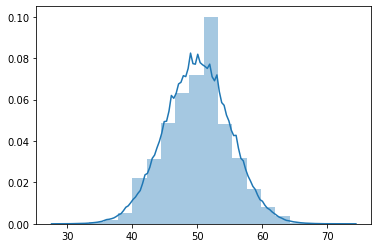

In [9]:
import numpy as np
import seaborn as sns

num_tries = 100000
simulation = np.random.randint(0,2,size=(num_tries,100))

num_faces = np.sum(simulation,axis=1)
sns.distplot(num_faces,bins=20);

## Exercice 4

<div class="alert alert-info">
**Exercice 4)**

Dans une cantine on propose deux desserts à chaque repas. La
probabilité que l’un des deux desserts soit un yaourt est 0,4. La
probabilité que l’un des deux desserts soit une orange est 0,8. La
probabilité d’obtenir un yaourt et une orange est 0,3. Calculer la
probabilité que l’on propose :
</div>

### Exercice 4a)
<div class="alert alert-info">
**Exercice 4a)**

un yaourt et pas d’orange
</div>

Denotons l'événement que un des deux desserts soit un yaourt par $Y$, et une orange par $O$. L'information donnée est donc

$$
P(Y)=0.4,\quad P(O)=0.8,\quad P(Y\cap O)=0.3
$$

Dans ce question on doit calculer $P(Y\setminus O)$. On a que $Y = (Y\setminus O) \cup (Y\cap O)$ comme union disjoint, alors

$$P(Y) = P(Y\setminus O)+P(Y\cap O)$$

Et on trouve

$$
    P(Y\setminus O) = P(Y)-P(Y\cap O) = 0.4-0.3 = 0.1
$$

### Exercice 4b)

<div class="alert alert-info">
**Exercice 4b)**

une orange et pas de yaourt
</div>

On doit calculer $P(O\setminus Y)$. Comme avant,

$$
P(O\setminus Y) = P(O)-P(Y\cap O) = 0.8-0.3 = 0.5
$$

### Exercice 4c)
<div class="alert alert-info">
**Exercice 4c)**

ni orange ni yaourt
</div>

On doit calculer $P(O^c\cup Y^c)=P((O\cap Y)^c)$, ou $A^c=\Omega\setminus A$ denote l'ensemble complementaire. Par ce que $\Omega=A\cup A^c$ comme union disjoint, on a que $P(A^c) = 1-P(A)$. Donc,

$$
P((O\cap Y)^c) = 1- P(O\cap Y) = 0.7
$$